In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("cancer database.csv")
df

,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab,coursera
0,Jonsson Comprehensive Cancer Center,22,jonsson-comprehensive-cancer-center,nciCancerCenter,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,Exercise,3,exercise,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,Nutrition,3,nutrition,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,Sleep,3,sleep,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,Stress Management,3,stress-management,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for each in df.columns:
    df[each].dropna()
    if df[each].astype(str).str.match(r'http[s]?://', na=False).any():
         dfup=df.drop(columns=each)
dfup

,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,eventsPage,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab
0,Jonsson Comprehensive Cancer Center,22,jonsson-comprehensive-cancer-center,nciCancerCenter,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,Exercise,3,exercise,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,Nutrition,3,nutrition,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,Sleep,3,sleep,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,Stress Management,3,stress-management,lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
grouped = dfup.groupby('type')
tdf={}
for t,gr in grouped:
    tdf[t]=gr
tdf.keys()

dict_keys(['ablationProcedure', 'app', 'awarenessEvent', 'book', 'breathTreatment', 'cancerNonProfit', 'cancerNonProfit governmentFundedNonProfit', 'cancerNonProfit researchCenter', 'cancerType', 'caregiverService', 'caregiverService hospiceCareService', 'chemotherapyDrug', 'chemotherapyDrug alkylatingAgent', 'chemotherapyDrug anthracycline', 'chemotherapyDrug taxane', 'chemotherapyProcedure', 'clothing', 'company', 'consortium', 'ctScan imagingProcedure', 'device', 'diagnosticTest', 'diet', 'diet lifestyle', 'documentary', 'drug', 'drug tyrosineKinaseInhibitor', 'exercise breathTreatment', 'governmentFundedNonProfit', 'herbal', 'hospital', 'hospital cancerNonProfit', 'hospital childrensHospital', 'hospital researchCenter', 'imagingProcedure', 'imagingProcedure diagnosticTest', 'imagingProcedure surgery', 'immunotherapy', 'intergovernmentalCancerOrganization', 'internationalOrganization', 'journal', 'lifestyle', 'lifestyle diet', 'lotion', 'magazine', 'majorResearchEffort', 'mentalTrea

In [5]:
cancerdf=tdf['cancerType']
cancerdf=cancerdf.drop(columns=['type'])
cancerdf

,title,length,id,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,umls,...,eventsPage,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab
1,Skin Cancer,28,skin,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,C1123023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,C0005682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,C0006141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,C0024109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Prostate Cancer,25,prostate,Prostate,4.0,1.0,"Prostate Cancer, NOS",TISSUE,PROSTATE,C0033572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,Yolk Sac Tumor CNS/Brain,10,yolk-sac-tumor-cns-brain,CNS/Brain,0.0,3.0,Germ Cell Tumor,BGCT,BYST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,Acute lymphoblastic leukemia,11,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,Male Breast Cancer,9,male-breast-cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1268,Colorectal Cancer,8,colorectal,Colon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfna=cancerdf.dropna(axis=1,how='all')
dfna

,title,length,id,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,umls,...,uscsCasesPerYear,uscsMortalityRate,uscsDeathsPerYear,gco,uscsId,cancerDotOrg,cancerDotGov,annualDeathsReport,youTube,wolframAlpha
1,Skin Cancer,28,skin,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,C1123023,...,88001.0,9%,8059.0,https://gco.iarc.fr/today/data/factsheets/canc...,Melanomas of the Skin,https://www.cancer.org/cancer/skin-cancer.html,https://www.cancer.gov/types/skin,NaN,https://www.youtube.com/watch?v=YWppfk2Np6A,https://www.wolframalpha.com/input?i=skin+cancer
2,Bladder Cancer,26,bladder-cancer,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,C0005682,...,74949.0,22%,16757.0,https://gco.iarc.fr/today/data/factsheets/canc...,Urinary Bladder,https://www.cancer.org/cancer/bladder-cancer.html,https://www.cancer.gov/types/bladder,NaN,NaN,NaN
3,Breast Cancer,26,breast,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,C0006141,...,264115.0,16%,42269.0,https://gco.iarc.fr/today/data/factsheets/canc...,Female Breast,https://www.cancer.org/cancer/breast-cancer.html,https://www.cancer.gov/types/breast,2020 42275,NaN,NaN
4,Lung Cancer,26,lung,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,C0024109,...,221020.0,63%,139558.0,https://gco.iarc.fr/today/data/factsheets/canc...,Lung and Bronchus,https://www.cancer.org/cancer/lung-cancer.html,https://www.cancer.gov/types/lung,2020 136084,NaN,NaN
8,Prostate Cancer,25,prostate,Prostate,4.0,1.0,"Prostate Cancer, NOS",TISSUE,PROSTATE,C0033572,...,224703.0,14%,31628.0,https://gco.iarc.fr/today/data/factsheets/canc...,NaN,https://www.cancer.org/cancer/prostate-cancer....,https://www.cancer.gov/types/prostate,2020 32707,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,Yolk Sac Tumor CNS/Brain,10,yolk-sac-tumor-cns-brain,CNS/Brain,0.0,3.0,Germ Cell Tumor,BGCT,BYST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,Acute lymphoblastic leukemia,11,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.cancer.org/cancer/acute-lymphocyti...,NaN,NaN,https://www.youtube.com/watch?v=_Mls5TViEhg,NaN
1214,Male Breast Cancer,9,male-breast-cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Male Breast,NaN,NaN,NaN,NaN,NaN
1268,Colorectal Cancer,8,colorectal,Colon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cancer.gov/types/colorectal,2020 51869,NaN,NaN


In [7]:
missing_values =dfna.isnull().sum()
print(missing_values)
    

title                   0
length                  0
id                      0
tissue                 10
subTypes               11
oncoTreeLevel          11
mainType               11
parentOncoTreeId       11
oncoTreeId             11
umls                  323
nciCode               339
wikipedia             831
reference             842
aka                   858
uscsTable             839
uscsCasesPerYear      840
uscsMortalityRate     841
uscsDeathsPerYear     841
gco                   841
uscsId                843
cancerDotOrg          846
cancerDotGov          852
annualDeathsReport    859
youTube               863
wolframAlpha          864
dtype: int64


In [8]:
data_types = dfna.dtypes
print(data_types)

title                  object
length                  int64
id                     object
tissue                 object
subTypes              float64
oncoTreeLevel         float64
mainType               object
parentOncoTreeId       object
oncoTreeId             object
umls                   object
nciCode                object
wikipedia              object
reference              object
aka                    object
uscsTable              object
uscsCasesPerYear      float64
uscsMortalityRate      object
uscsDeathsPerYear     float64
gco                    object
uscsId                 object
cancerDotOrg           object
cancerDotGov           object
annualDeathsReport     object
youTube                object
wolframAlpha           object
dtype: object


In [9]:
remdf=dfna.drop(columns=["umls","nciCode","aka"])
remdf

,title,length,id,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,wikipedia,...,uscsCasesPerYear,uscsMortalityRate,uscsDeathsPerYear,gco,uscsId,cancerDotOrg,cancerDotGov,annualDeathsReport,youTube,wolframAlpha
1,Skin Cancer,28,skin,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,https://en.wikipedia.org/wiki/Skin_cancer,...,88001.0,9%,8059.0,https://gco.iarc.fr/today/data/factsheets/canc...,Melanomas of the Skin,https://www.cancer.org/cancer/skin-cancer.html,https://www.cancer.gov/types/skin,NaN,https://www.youtube.com/watch?v=YWppfk2Np6A,https://www.wolframalpha.com/input?i=skin+cancer
2,Bladder Cancer,26,bladder-cancer,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,https://en.wikipedia.org/wiki/Bladder_cancer,...,74949.0,22%,16757.0,https://gco.iarc.fr/today/data/factsheets/canc...,Urinary Bladder,https://www.cancer.org/cancer/bladder-cancer.html,https://www.cancer.gov/types/bladder,NaN,NaN,NaN
3,Breast Cancer,26,breast,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,https://en.wikipedia.org/wiki/Breast_cancer,...,264115.0,16%,42269.0,https://gco.iarc.fr/today/data/factsheets/canc...,Female Breast,https://www.cancer.org/cancer/breast-cancer.html,https://www.cancer.gov/types/breast,2020 42275,NaN,NaN
4,Lung Cancer,26,lung,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,https://en.wikipedia.org/wiki/Lung_cancer,...,221020.0,63%,139558.0,https://gco.iarc.fr/today/data/factsheets/canc...,Lung and Bronchus,https://www.cancer.org/cancer/lung-cancer.html,https://www.cancer.gov/types/lung,2020 136084,NaN,NaN
8,Prostate Cancer,25,prostate,Prostate,4.0,1.0,"Prostate Cancer, NOS",TISSUE,PROSTATE,https://en.wikipedia.org/wiki/Prostate_cancer,...,224703.0,14%,31628.0,https://gco.iarc.fr/today/data/factsheets/canc...,NaN,https://www.cancer.org/cancer/prostate-cancer....,https://www.cancer.gov/types/prostate,2020 32707,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,Yolk Sac Tumor CNS/Brain,10,yolk-sac-tumor-cns-brain,CNS/Brain,0.0,3.0,Germ Cell Tumor,BGCT,BYST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,Acute lymphoblastic leukemia,11,all,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Acute_lymphoblas...,...,NaN,NaN,NaN,NaN,NaN,https://www.cancer.org/cancer/acute-lymphocyti...,NaN,NaN,https://www.youtube.com/watch?v=_Mls5TViEhg,NaN
1214,Male Breast Cancer,9,male-breast-cancer,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Male_breast_cancer,...,NaN,NaN,NaN,NaN,Male Breast,NaN,NaN,NaN,NaN,NaN
1268,Colorectal Cancer,8,colorectal,Colon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cancer.gov/types/colorectal,2020 51869,NaN,NaN


In [10]:
for lev in [1.0,2.0,3.0,None]:
    if lev:
        level_df = remdf[(remdf['oncoTreeLevel'] == lev) 
                                          & (~pd.isna(remdf['uscsTable']))]
        print(f'There are {len(level_df)} rows with uscsTable on level {lev}')
    else:
        level_df = remdf[(pd.isna(remdf['oncoTreeLevel'])) 
                                          & (~pd.isna(remdf['uscsTable']))]
        print(f'There are {len(level_df)} rows with uscsTable outside OncoTree')
        

There are 16 rows with uscsTable on level 1.0
There are 0 rows with uscsTable on level 2.0
There are 2 rows with uscsTable on level 3.0
There are 8 rows with uscsTable outside OncoTree


In [11]:
exdf = {}

for index, row in remdf.iterrows():
    row_data = row['uscsTable']
    if not pd.isna(row_data):
        df = pd.read_csv(StringIO(row_data), sep='|')
        df.replace('~', np.nan, inplace=True)
        for col in ['population', 'cases', 'deaths']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        exdf[row['title']] = df

In [12]:
del exdf["Male Breast Cancer"]

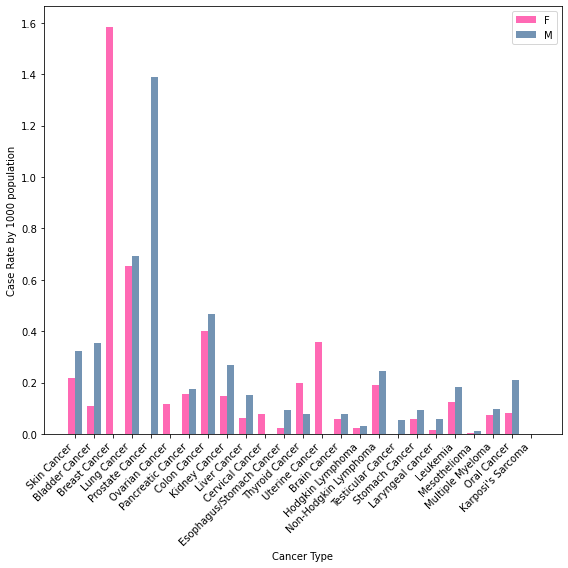

In [19]:
diseases = list(exdf.keys())
genders = exdf['Skin Cancer']['sex'].unique()

dis_width = 1.1
off_set = dis_width / 2
index = np.arange(len(diseases)) * 3

fig, ax = plt.subplots(figsize=(8, 8))
color_case = ['#FF69B4', '#7393B3']
tt = [-1, +1]

for i, df_key in enumerate(exdf):
    df_uscs = exdf[df_key].fillna(0)
    
    for k, gender in enumerate(genders):
        filtered_df = df_uscs[df_uscs['sex'] == gender]
        pop_sum = filtered_df['population'].sum()
        cases_sum = filtered_df['cases'].sum()
        cases_rate = (cases_sum / pop_sum) * 1000.0 if pop_sum else 0.0
        if i == 0:
            ax.bar(index[i] + tt[k] * off_set, 
                   cases_rate, dis_width, 
                   label=f'{gender}', color=color_case[k])
        else:
            ax.bar(index[i] + tt[k] * off_set, 
                   cases_rate, dis_width, color=color_case[k])

    ax.set_xlabel('Cancer Type')
    ax.set_ylabel('Case Rate by 1000 population')
    ax.set_xticks(index, diseases, rotation=45, ha='right')
    ax.legend()

plt.tight_layout()
plt.show()


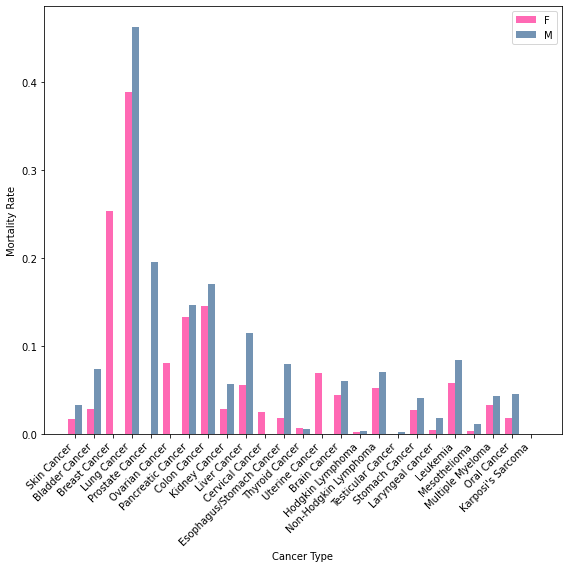

In [35]:
diseases = list(exdf.keys())
genders = exdf['Skin Cancer']['sex'].unique()

dis_width = 1.1
off_set = dis_width / 2
index = np.arange(len(diseases)) * 3

fig, ax = plt.subplots(figsize=(8, 8))
color_case = ['#FF69B4', '#7393B3']
tt = [-1, +1]

for i, df_key in enumerate(exdf):
    df_uscs = exdf[df_key].fillna(0)
    
    for k, gender in enumerate(genders):
        filtered_df = df_uscs[df_uscs['sex'] == gender]
        pop_sum = filtered_df['population'].sum()
        deaths_sum = filtered_df['deaths'].sum()
        mortality_rate = (deaths_sum / pop_sum) * 1000.0 if pop_sum else 0.0
        if i == 0:
            ax.bar(index[i] + tt[k] * off_set, 
                  mortality_rate, dis_width, 
                   label=f'{gender}', color=color_case[k])
        else:
            ax.bar(index[i] + tt[k] * off_set, 
                  mortality_rate, dis_width, color=color_case[k])

    ax.set_xlabel('Cancer Type')
    ax.set_ylabel('Mortality Rate')
    ax.set_xticks(index, diseases, rotation=45, ha='right')
    ax.legend()

plt.tight_layout()
plt.show()

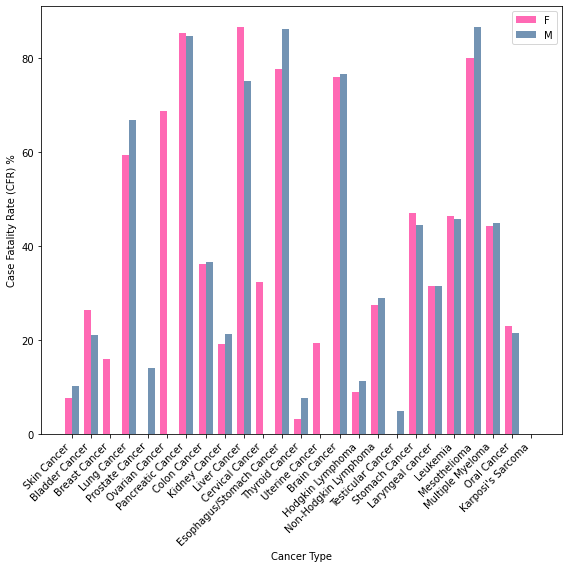

In [28]:
diseases = list(exdf.keys())
genders = exdf['Skin Cancer']['sex'].unique()

dis_width = 1.1
off_set = dis_width / 2
index = np.arange(len(diseases)) * 3

fig, ax = plt.subplots(figsize=(8, 8))
color_case = ['#FF69B4', '#7393B3']
tt = [-1, +1]

for i, df_key in enumerate(exdf):
    df_uscs = exdf[df_key].fillna(0)
    
    for k, gender in enumerate(genders):
        filtered_df = df_uscs[df_uscs['sex'] == gender]
        cases_sum = filtered_df['cases'].sum()
        deaths_sum = filtered_df['deaths'].sum()
        cfr = (deaths_sum / cases_sum) * 100.0 if cases_sum else 0.0
        if i == 0:
            ax.bar(index[i] + tt[k] * off_set, cfr, dis_width, 
                   label=f'{gender}', color=color_case[k])
        else:
            ax.bar(index[i] + tt[k] * off_set, cfr, dis_width, color=color_case[k])

    ax.set_xlabel('Cancer Type')
    ax.set_ylabel('Case Fatality Rate (CFR) %')
    ax.set_xticks(index, diseases, rotation=45, ha='right')
    ax.legend()

plt.tight_layout()
plt.show()

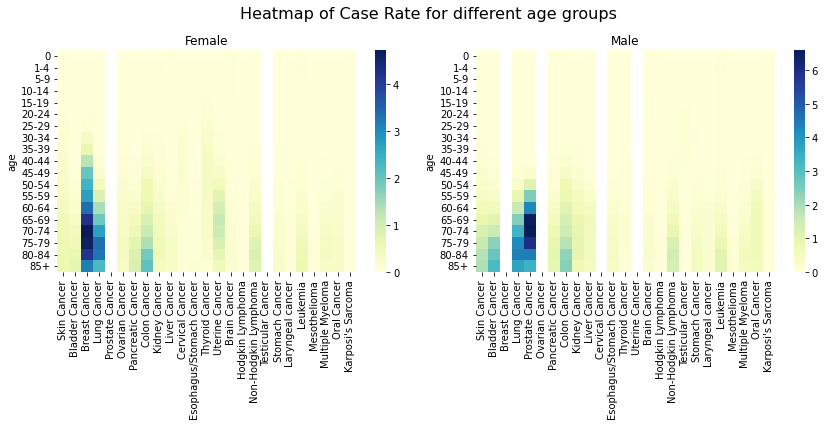

In [32]:
df_merged_f = pd.DataFrame()
df_merged_m = pd.DataFrame()

for i, df_key in enumerate(exdf):
    df_uscs = exdf[df_key].fillna(0)
    df_uscs_f = df_uscs.loc[df_uscs['sex'] == 'F'].reset_index()
    df_uscs_m = df_uscs.loc[df_uscs['sex'] == 'M'].reset_index()
    
    if df_merged_f.empty:
        df_merged_f['age'] = df_uscs_f['age']
        df_merged_f[df_key] = (df_uscs_f['cases'] / df_uscs_f['population']) * 1000.0
        df_merged_m['age'] = df_uscs_m['age']
        df_merged_m[df_key] = (df_uscs_m['cases'] / df_uscs_m['population']) * 1000.0
    else:
        df_merged_f[df_key] = (df_uscs_f['cases'] / df_uscs_f['population']) * 1000.0
        df_merged_m[df_key] = (df_uscs_m['cases'] / df_uscs_m['population']) * 1000.0

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_merged_f = df_merged_f.set_index('age')
sb.heatmap(df_merged_f, cmap='YlGnBu', ax=axes[0], xticklabels=True)
axes[0].set_title('Female')

df_merged_m = df_merged_m.set_index('age')
sb.heatmap(df_merged_m, cmap='YlGnBu', ax=axes[1], xticklabels=True)
axes[1].set_title('Male')

fig.suptitle('Heatmap of Case Rate for different age groups', fontsize=16)

plt.tight_layout()
plt.show()

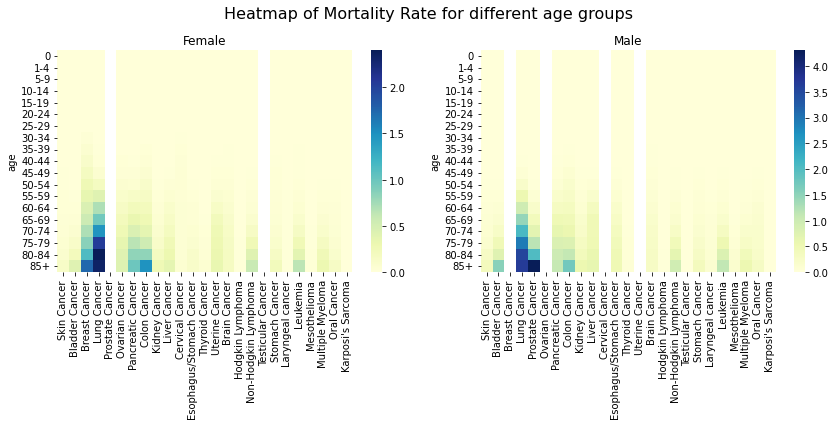

In [33]:
df_merged_f = pd.DataFrame()
df_merged_m = pd.DataFrame()

for i, df_key in enumerate(exdf):
    df_uscs = exdf[df_key].fillna(0)
    df_uscs_f = df_uscs.loc[df_uscs['sex'] == 'F'].reset_index()
    df_uscs_m = df_uscs.loc[df_uscs['sex'] == 'M'].reset_index()
    
    if df_merged_f.empty:
        df_merged_f['age'] = df_uscs_f['age']
        df_merged_f[df_key] = (df_uscs_f['deaths'] / df_uscs_f['population']) * 1000.0
    else:
        df_merged_f[df_key] = (df_uscs_f['deaths'] / df_uscs_f['population']) * 1000.0
    if df_merged_m.empty:
        df_merged_m['age'] = df_uscs_m['age']
        df_merged_m[df_key] = (df_uscs_m['deaths'] / df_uscs_m['population']) * 1000.0
    else:
        df_merged_m[df_key] = (df_uscs_m['deaths'] / df_uscs_m['population']) * 1000.0

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_merged_f = df_merged_f.set_index('age')
sb.heatmap(df_merged_f, cmap='YlGnBu', ax=axes[0], xticklabels=True)
axes[0].set_title('Female')

df_merged_m = df_merged_m.set_index('age')
sb.heatmap(df_merged_m, cmap='YlGnBu', ax=axes[1], xticklabels=True)
axes[1].set_title('Male')

fig.suptitle('Heatmap of Mortality Rate for different age groups', fontsize=16)

plt.tight_layout()
plt.show()